# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [476]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [477]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [478]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [479]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [480]:
df_hh_income_clean = df_hh_income.fillna(0)

In [481]:
df_hh_income_clean.isna().any()

Geographic Area    False
City               False
Median Income      False
dtype: bool

In [482]:
df_pct_poverty.isna().any()

Geographic Area    False
City               False
poverty_rate       False
dtype: bool

In [483]:
df_pct_completed_hs.isna().any()

Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool

In [484]:
df_share_race_city.isna().any()

Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool

In [485]:
df_fatalities.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                       True
age                         True
gender                     False
race                        True
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                        True
body_camera                False
dtype: bool

In [486]:
df_fatalities_clean = df_fatalities.fillna(0)

In [487]:
df_fatalities_clean.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
dtype: bool

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [488]:
df_hh_income_clean.duplicated().any()

False

In [489]:
df_pct_poverty.duplicated().any()

False

In [490]:
df_pct_completed_hs.duplicated().any()

False

In [491]:
df_share_race_city.duplicated().any()

False

In [492]:
df_fatalities_clean.duplicated().any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [493]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [494]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].str.replace('-', '0').astype(float)

In [495]:
df_pct_poverty_state = df_pct_poverty.groupby(['Geographic Area'], as_index=False).agg({'poverty_rate': pd.Series.mean})

In [496]:
df_pct_poverty_state

Geographic Area  poverty_rate
0               AK         18.68
1               AL         20.61
2               AR         22.96
3               AZ         25.27
4               CA         16.89
5               CO         13.19
6               CT          9.14
7               DC         18.00
8               DE         12.56
9               FL         17.51
10              GA         23.66
11              HI         13.40
12              IA         12.23
13              ID         18.08
14              IL         13.85
15              IN         15.50
16              KS         14.72
17              KY         20.08
18              LA         22.29
19              MA          9.55
20              MD         10.27
21              ME         16.89
22              MI         17.90
23              MN         13.75
24              MO         19.93
25              MS         26.88
26              MT         16.42
27              NC         19.72
28              ND         12.13
29              NE         12.92
30              NH         12.66
31              NJ          8.16
32              NM         22.51
33              NV         12.37
34              NY         11.64
35              OH         14.83
36              OK         20.55
37              OR         16.44
38              PA         12.49
39              RI         10.37
40              SC         22.11
41              SD         15.75
42              TN         19.89
43              TX         19.50
44              UT         11.72
45              VA         14.59
46              VT         13.79
47              WA         14.83
48              WI         12.86
49              WV         21.08
50              WY          9.06

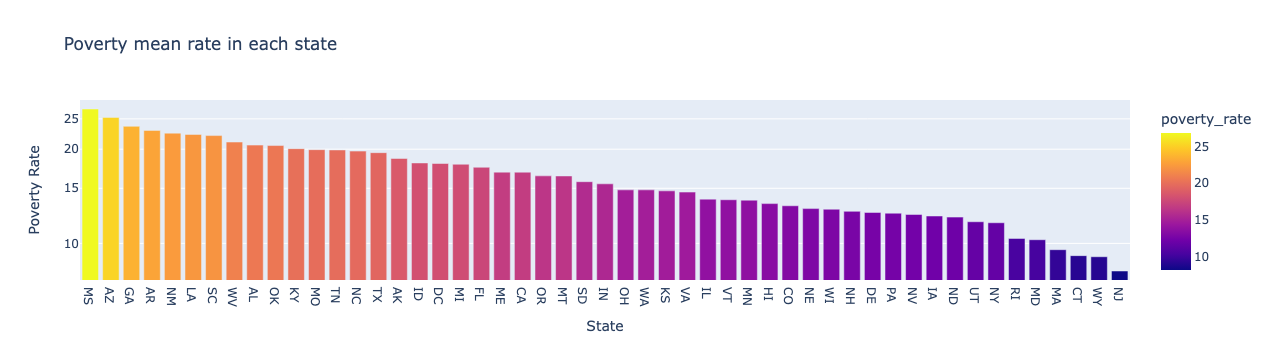

In [497]:
g_bar = px.bar(df_pct_poverty_state,
               x='Geographic Area',
               y='poverty_rate',
               title='Poverty mean rate in each state',
               color='poverty_rate',
               barmode='group')

g_bar.update_layout(xaxis_title='State',
                    yaxis_title='Poverty Rate',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
g_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [498]:
df_pct_completed_hs.head()

Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
3              AL     Addison town                 81.4
4              AL       Akron town                 68.6

In [499]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].str.replace('-', '0').astype(float)

In [500]:
df_pct_completed_hs_state = df_pct_completed_hs.groupby(['Geographic Area'], as_index=False).agg({'percent_completed_hs': pd.Series.mean})

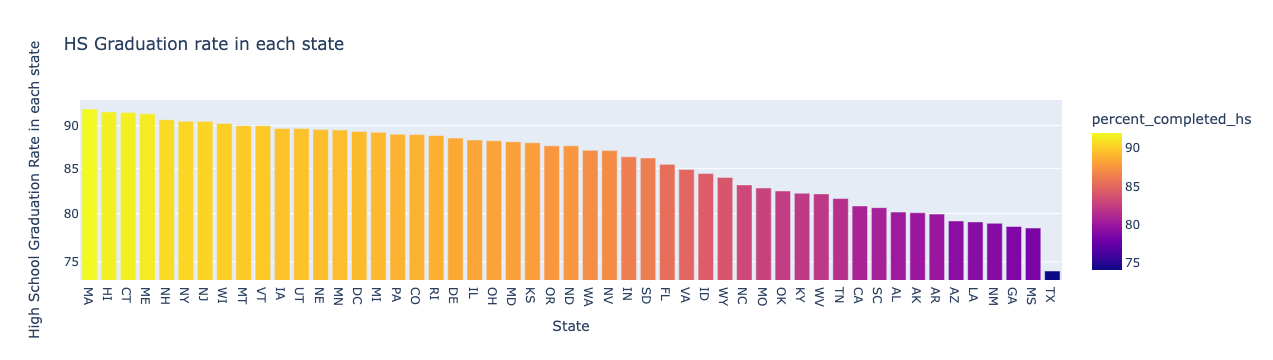

In [501]:
g_bar = px.bar(df_pct_completed_hs_state,
               x='Geographic Area',
               y='percent_completed_hs',
               title='HS Graduation rate in each state',
               color='percent_completed_hs',
               barmode='group')

g_bar.update_layout(xaxis_title='State',
                    yaxis_title='High School Graduation Rate in each state',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
g_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

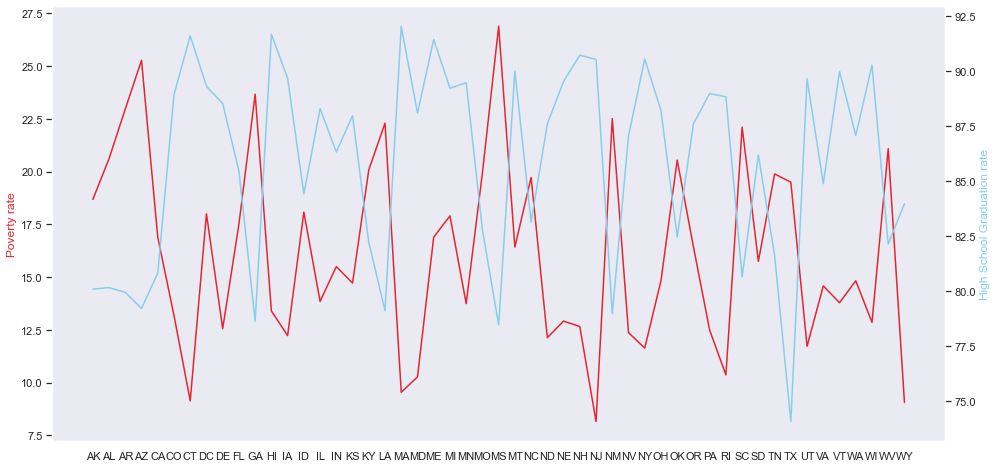

In [502]:
plt.figure (figsize = (16, 8))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Poverty rate', color='#E6232E') # can use a HEX code
ax2.set_ylabel('High School Graduation rate', color='skyblue') # or a named colour

ax1.plot(df_pct_poverty_state['Geographic Area'], df_pct_poverty_state['poverty_rate'], color='#E6232E')
ax2.plot(df_pct_completed_hs_state['Geographic Area'], df_pct_completed_hs_state['percent_completed_hs'], color='skyblue')

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [503]:
df_poverty_hs = pd.merge(df_pct_completed_hs_state, df_pct_poverty_state, how="outer", on=["Geographic Area"])

In [504]:
df_poverty_hs

Geographic Area  percent_completed_hs  poverty_rate
0               AK                 80.10         18.68
1               AL                 80.16         20.61
2               AR                 79.95         22.96
3               AZ                 79.22         25.27
4               CA                 80.82         16.89
5               CO                 88.93         13.19
6               CT                 91.59          9.14
7               DC                 89.30         18.00
8               DE                 88.52         12.56
9               FL                 85.46         17.51
10              GA                 78.63         23.66
11              HI                 91.67         13.40
12              IA                 89.67         12.23
13              ID                 84.42         18.08
14              IL                 88.29         13.85
15              IN                 86.32         15.50
16              KS                 87.97         14.72
17              KY                 82.22         20.08
18              LA                 79.12         22.29
19              MA                 92.03          9.55
20              MD                 88.08         10.27
21              ME                 91.43         16.89
22              MI                 89.21         17.90
23              MN                 89.47         13.75
24              MO                 82.79         19.93
25              MS                 78.47         26.88
26              MT                 89.99         16.42
27              NC                 83.14         19.72
28              ND                 87.60         12.13
29              NE                 89.52         12.92
30              NH                 90.71         12.66
31              NJ                 90.52          8.16
32              NM                 78.97         22.51
33              NV                 87.05         12.37
34              NY                 90.54         11.64
35              OH                 88.20         14.83
36              OK                 82.46         20.55
37              OR                 87.60         16.44
38              PA                 88.97         12.49
39              RI                 88.83         10.37
40              SC                 80.65         22.11
41              SD                 86.18         15.75
42              TN                 81.63         19.89
43              TX                 74.09         19.50
44              UT                 89.64         11.72
45              VA                 84.88         14.59
46              VT                 89.98         13.79
47              WA                 87.07         14.83
48              WI                 90.26         12.86
49              WV                 82.14         21.08
50              WY                 83.97          9.06

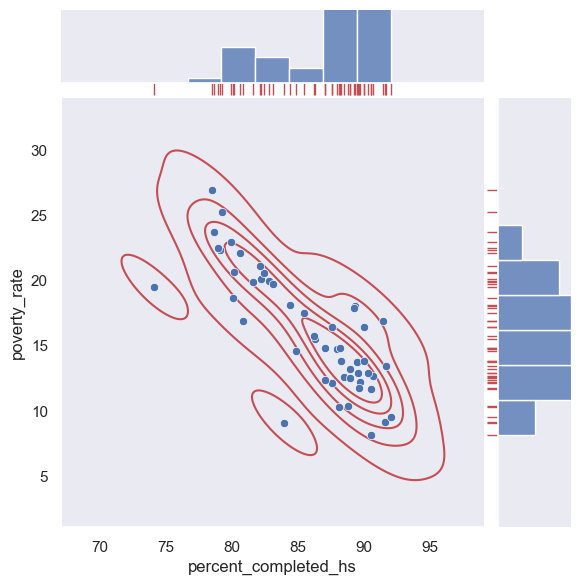

In [505]:
g = sns.jointplot(data=df_poverty_hs, x="percent_completed_hs", y="poverty_rate")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
g.fig.set_dpi(100)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

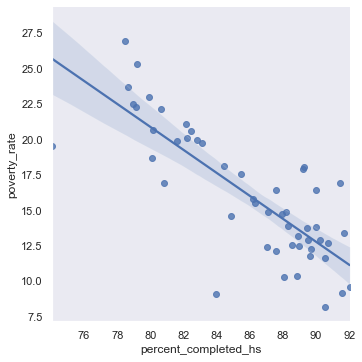

In [506]:
sns.lmplot(data=df_poverty_hs, x="percent_completed_hs", y="poverty_rate")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [507]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [508]:
dp_drop = df_share_race_city[df_share_race_city['share_white'] == '(X)']
df_share_race_city = df_share_race_city.drop(index = dp_drop.index, axis=1)

In [509]:
df_share_race_city['share_white'] = df_share_race_city['share_white'].str.replace('(0)', '0').astype(float)
df_share_race_city['share_black'] = df_share_race_city['share_black'].str.replace('(0)', '0').astype(float)
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].str.replace('(0)', '0').astype(float)
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].str.replace('(0)', '0').astype(float)
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].str.replace('(0)', '0').astype(float)

<ipython-input-509-18ce2a3564bd>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-509-18ce2a3564bd>:2: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-509-18ce2a3564bd>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-509-18ce2a3564bd>:4: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-509-18ce2a3564bd>:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [510]:
df_share_race_city.head()

Geographic area             City  share_white  share_black  \
0              AL       Abanda CDP        67.20        30.20   
1              AL   Abbeville city        54.40        41.40   
2              AL  Adamsville city        52.30        44.90   
3              AL     Addison town        99.10         0.10   
4              AL       Akron town        13.20        86.50   

   share_native_american  share_asian  share_hispanic  
0                   0.00         0.00            1.60  
1                   0.10         1.00            3.10  
2                   0.50         0.30            2.30  
3                   0.00         0.10            0.40  
4                   0.00         0.00            0.30

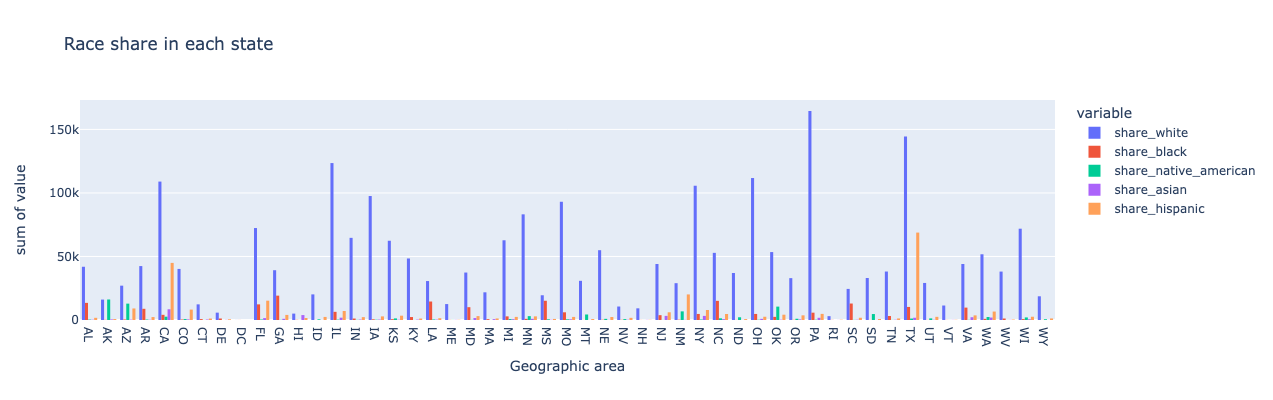

In [511]:
fig = px.histogram(df_share_race_city, x='Geographic area', y=['share_white', 'share_black','share_native_american','share_asian','share_hispanic'],
              barmode='group',height=400, title=f"Race share in each state")
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [512]:
df_fatalities_clean.value_counts('race')

race
W    1201
B     618
H     423
0     195
A      39
N      31
O      28
dtype: int64

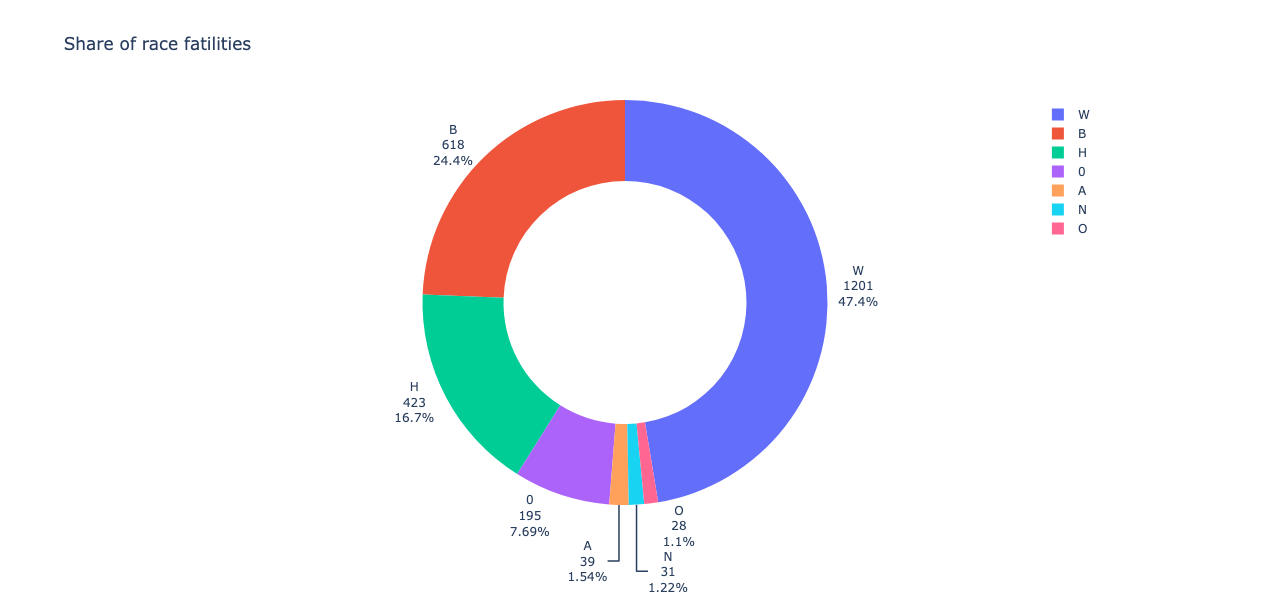

In [513]:
fig = px.pie(labels=['W', 'B','H','0','A','N','O'], values=df_fatalities_clean.value_counts('race'),
             names=['W', 'B','H','0','A','N','O'],hole=0.6, width=800, height=600, title="Share of race fatilities")
fig.update_traces(textposition='outside', textinfo='percent+value+label')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [514]:
df_fatalities_clean.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [515]:
df_fatalities_clean.value_counts('gender')

gender
M    2428
F     107
dtype: int64

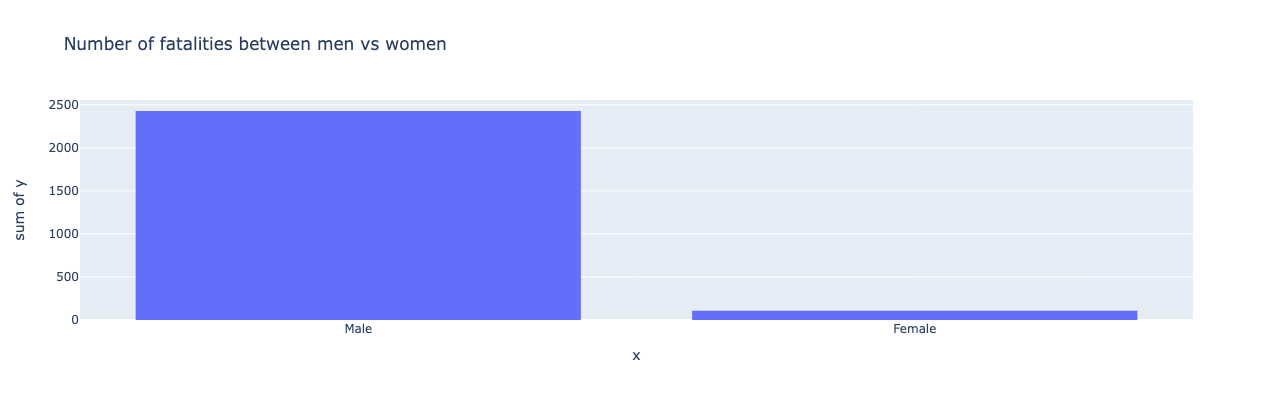

In [516]:
fig = px.histogram(df_fatalities_clean, x=['Male','Female'], y=df_fatalities_clean.value_counts('gender'),
              barmode='group',height=400, title='Number of fatalities between men vs women')
fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [517]:
df_fatalities_clean.head()

id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [518]:
df_fatalities_manner = df_fatalities_clean.groupby(["manner_of_death","gender"], as_index=False).agg({'id': pd.Series.count})

In [519]:
df_fatalities_manner

manner_of_death gender    id
0              shot      F   102
1              shot      M  2261
2  shot and Tasered      F     5
3  shot and Tasered      M   167

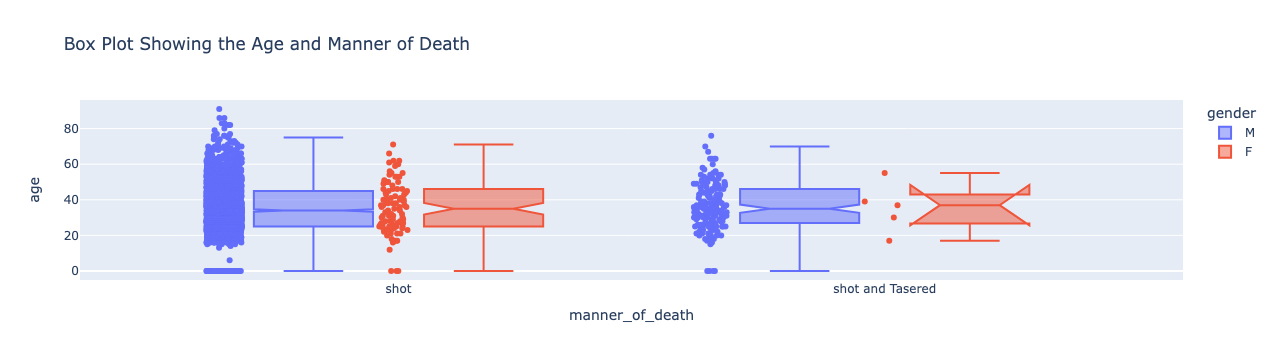

In [520]:
box = px.box(df_fatalities_clean,
             y='age',
             x='manner_of_death',
             color='gender',
             notched=True,
             points='all',
             title='Box Plot Showing the Age and Manner of Death')
 
# box.update_layout(yaxis=dict(type='log'))
 
box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [521]:
df_fatalities_clean['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', 0,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and

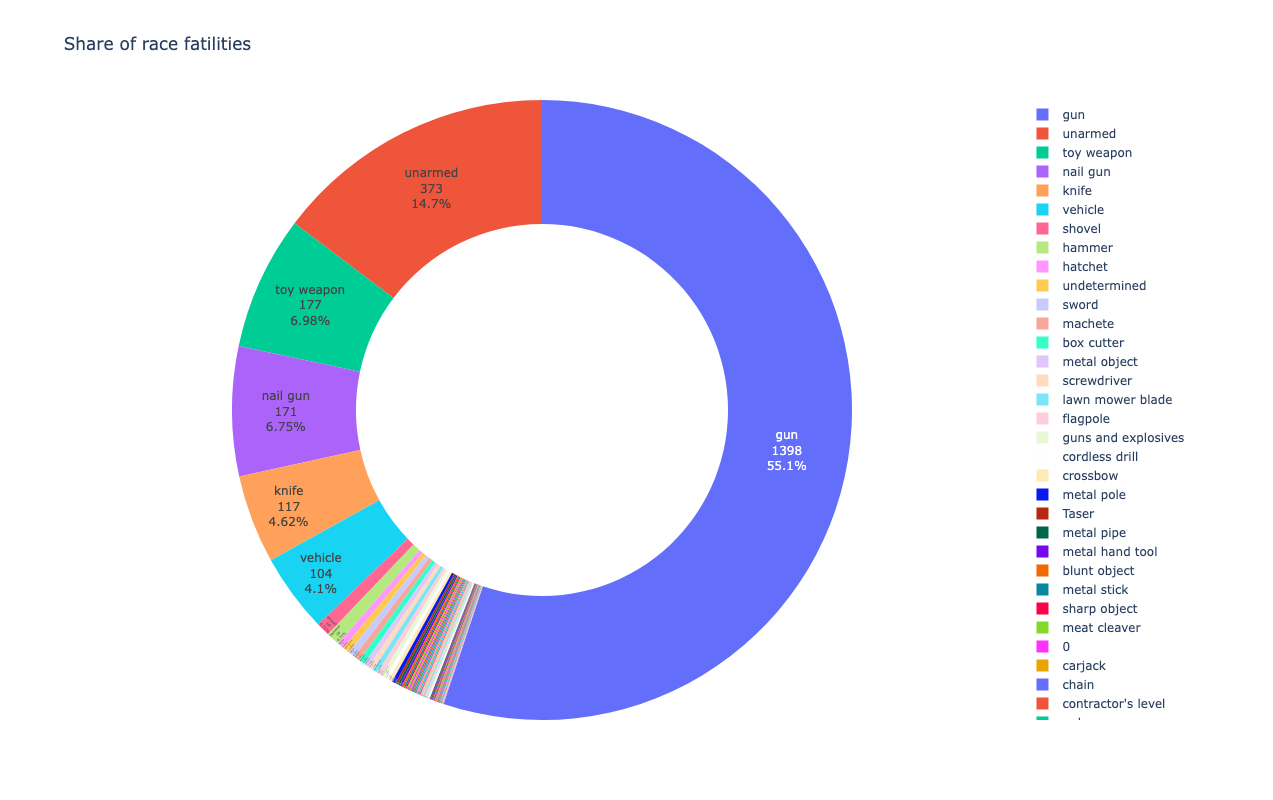

In [522]:
fig = px.pie(labels=df_fatalities_clean['armed'].unique(), values=df_fatalities_clean.value_counts('armed'),
             names=df_fatalities_clean['armed'].unique(),hole=0.6, width=1200, height=800, title="Share of race fatilities")
fig.update_traces(textposition='inside', textinfo='percent+value+label')

In [523]:
df_fatalities_clean['age'] = df_fatalities_clean['age'].astype(int)

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [524]:
df_fatalities_clean[df_fatalities_clean['age'] < 25].count()/df_fatalities_clean['age'].count()*100

id                        20.79
name                      20.79
date                      20.79
manner_of_death           20.79
armed                     20.79
age                       20.79
gender                    20.79
race                      20.79
city                      20.79
state                     20.79
signs_of_mental_illness   20.79
threat_level              20.79
flee                      20.79
body_camera               20.79
dtype: float64

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

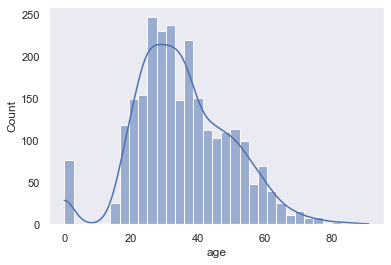

In [525]:
g = sns.histplot(data=df_fatalities_clean, x="age", stat="count", kde=True)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

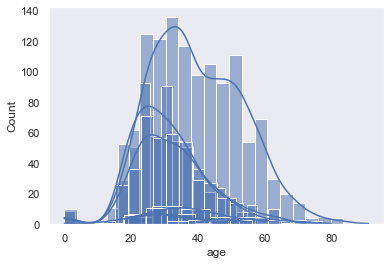

In [526]:
for item in ['W', 'B','H','0','A','N','O']:
    sns.histplot(data=df_fatalities_clean[df_fatalities_clean['race']==item], x="age", stat="count", kde=True)

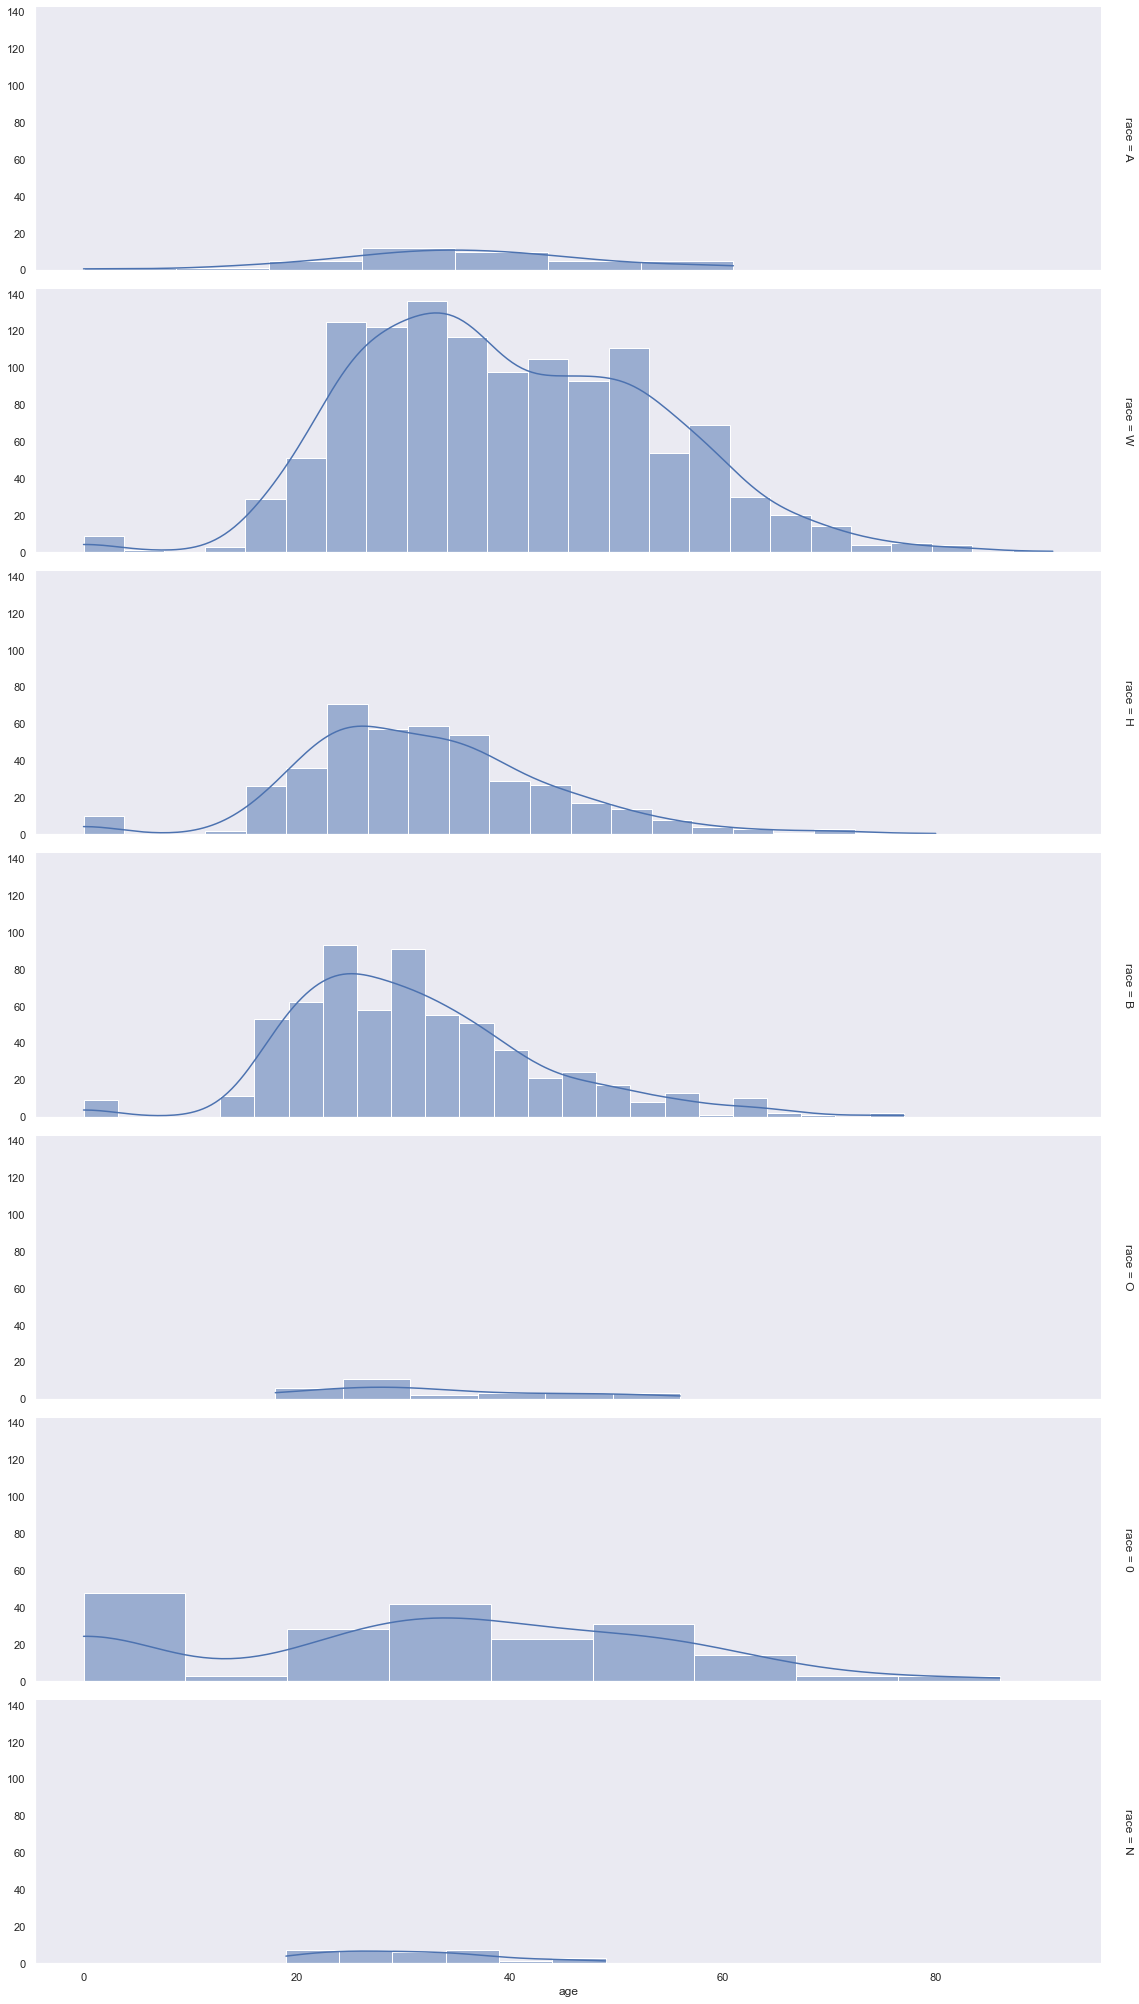

In [527]:
g = sns.FacetGrid(df_fatalities_clean, row="race", height=4, aspect=4, margin_titles=True)
g.map(sns.histplot, "age", kde=True)

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [528]:
race_fatilities = df_fatalities_clean.groupby(["race"], as_index=False).agg({'id': pd.Series.count})

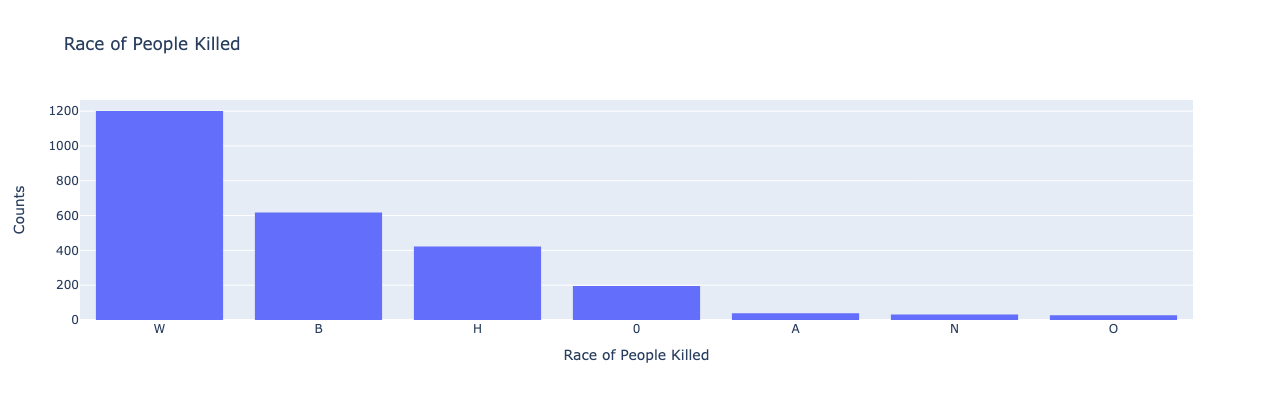

In [529]:
fig = px.histogram(race_fatilities, x='race', y='id',
              barmode='group',height=400, title=f"Race of People Killed")

fig.update_layout(  xaxis_title='Race of People Killed',
                    yaxis_title='Counts',
                    xaxis={'categoryorder':'total descending'},
                    )

fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

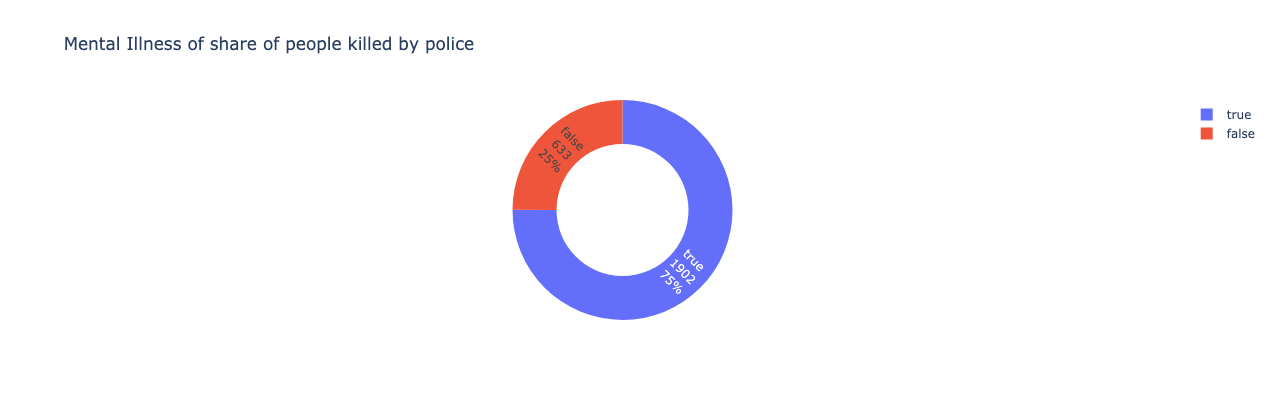

In [530]:
fig = px.pie(labels=df_fatalities_clean['signs_of_mental_illness'], values=df_fatalities_clean.value_counts('signs_of_mental_illness'),
             names=df_fatalities_clean['signs_of_mental_illness'].unique(),hole=0.6, width=800, height=400, title="Mental Illness of share of people killed by police")
fig.update_traces(textposition='inside', textinfo='percent+value+label')

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [531]:
city_fatilities = df_fatalities_clean.groupby(["city"], as_index=False).agg({'id': pd.Series.count})

In [532]:
city_fatilities.sort_values('id').tail(10)

city  id
1217    St. Louis  15
808         Miami  18
60         Austin  18
284      Columbus  19
1118  San Antonio  20
687     Las Vegas  21
241       Chicago  25
578       Houston  27
995       Phoenix  31
732   Los Angeles  39

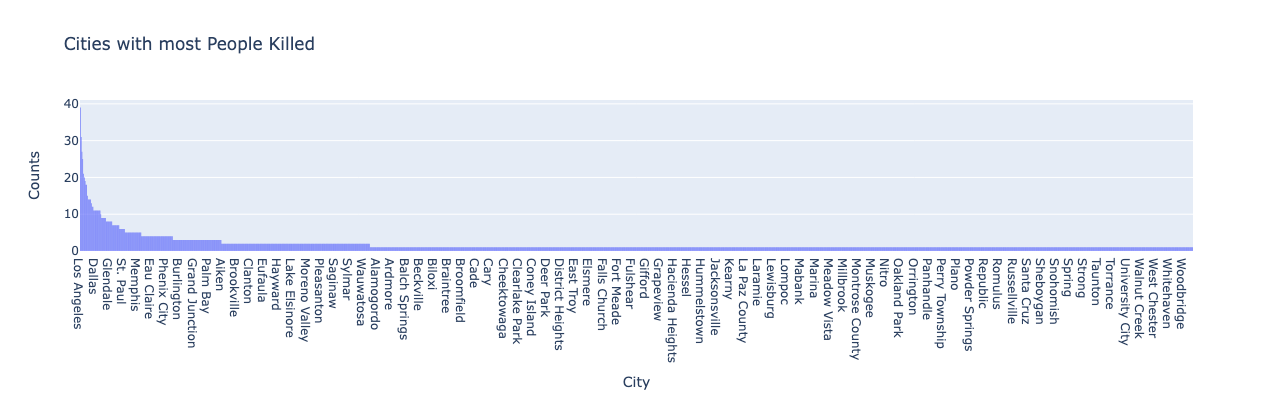

In [533]:
fig = px.histogram(city_fatilities, x='city', y='id',
              barmode='group',height=400, title=f"Cities with most People Killed")

fig.update_layout(  xaxis_title='City',
                    yaxis_title='Counts',
                    xaxis={'categoryorder':'total descending'},
                    )

fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [534]:
top_10_cities = city_fatilities.sort_values('id').tail(10)

In [535]:
top_10_cities

city  id
1217    St. Louis  15
808         Miami  18
60         Austin  18
284      Columbus  19
1118  San Antonio  20
687     Las Vegas  21
241       Chicago  25
578       Houston  27
995       Phoenix  31
732   Los Angeles  39

In [536]:
result = pd.merge(df_fatalities_clean,top_10_cities['city'], how='right')

In [537]:
result.head()

id                  name      date manner_of_death armed  age gender  \
0    90          Isaac Holmes  21/01/15            shot   gun   19      M   
1   117  Ledarius D. Williams  03/02/15            shot   gun   23      M   
2   751       Mansur Ball-Bey  19/08/15            shot   gun   18      M   
3  1061          Sheilah Huck  05/12/15            shot   gun   61      F   
4  1170          Crayton West  17/01/16            shot   gun   52      M   

  race       city state  signs_of_mental_illness threat_level         flee  \
0    B  St. Louis    MO                    False       attack  Not fleeing   
1    B  St. Louis    MO                    False       attack         Foot   
2    B  St. Louis    MO                    False       attack         Foot   
3    W  St. Louis    MO                    False       attack  Not fleeing   
4    B  St. Louis    MO                    False       attack  Not fleeing   

   body_camera  
0        False  
1        False  
2        False  
3        False  
4        False

In [538]:
result[result['city'] == 'St. Louis'].value_counts('race')

race
B    11
W     3
0     1
dtype: int64

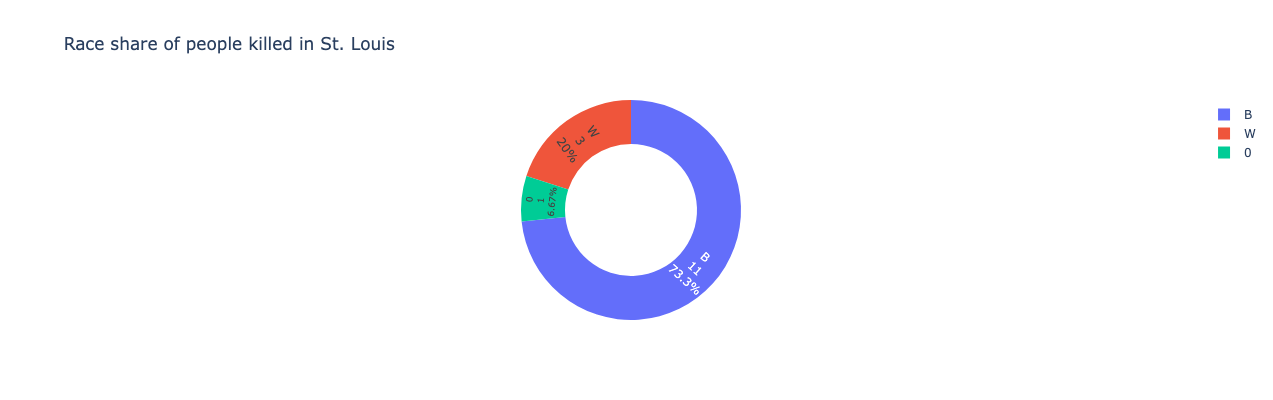

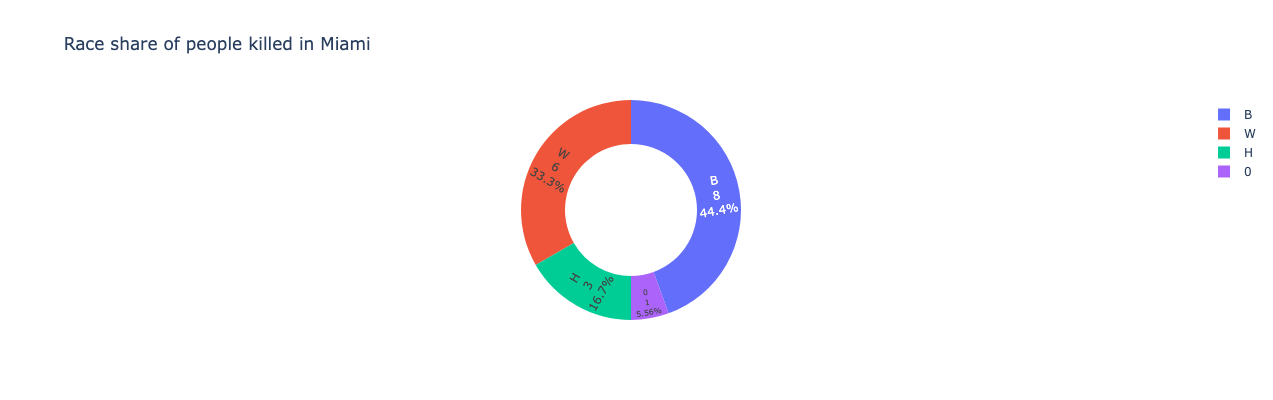

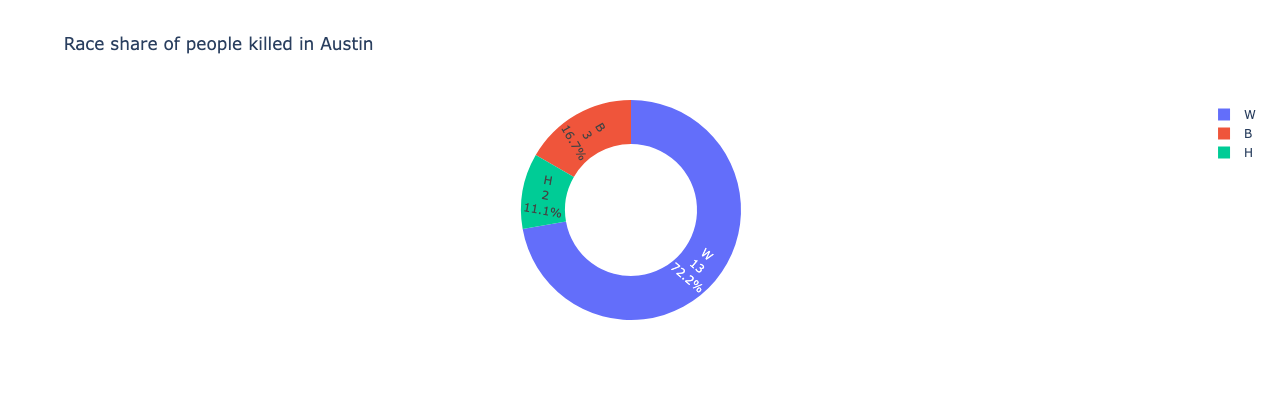

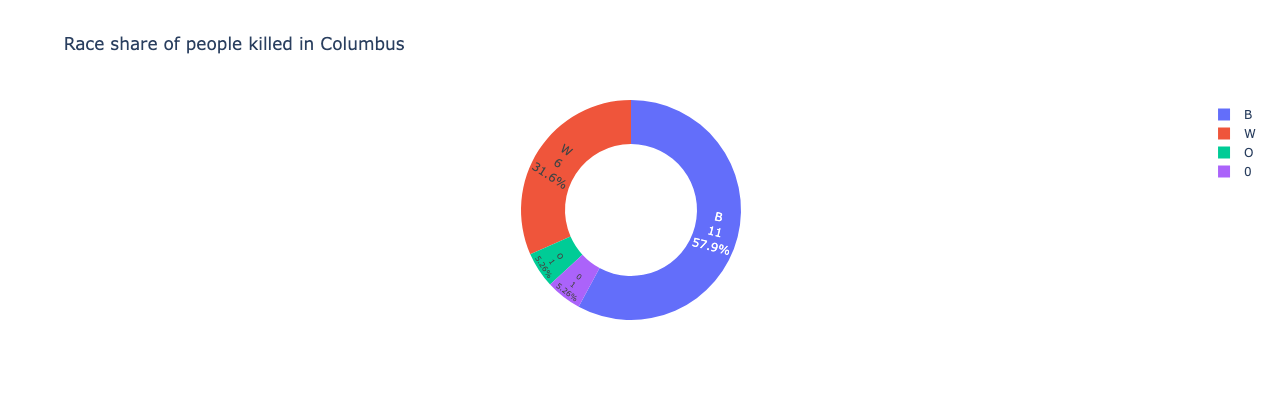

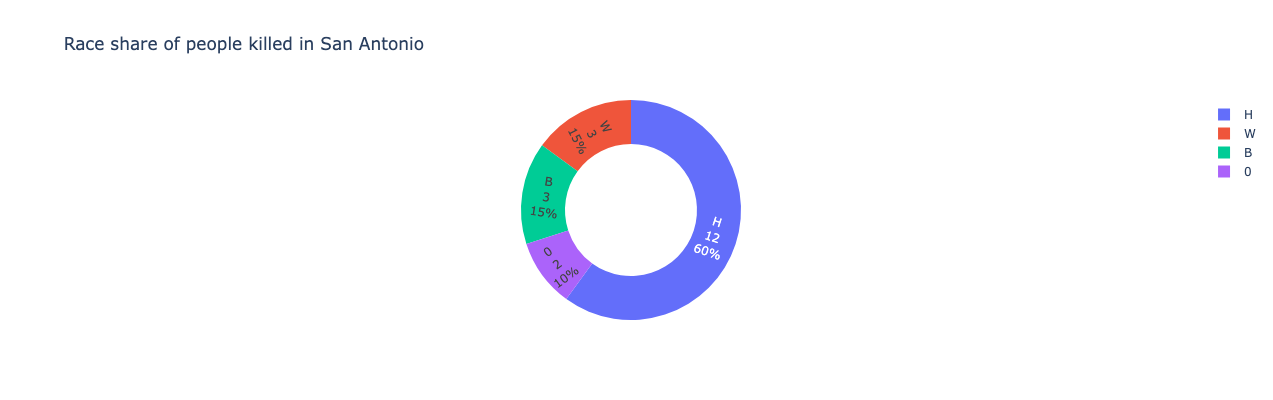

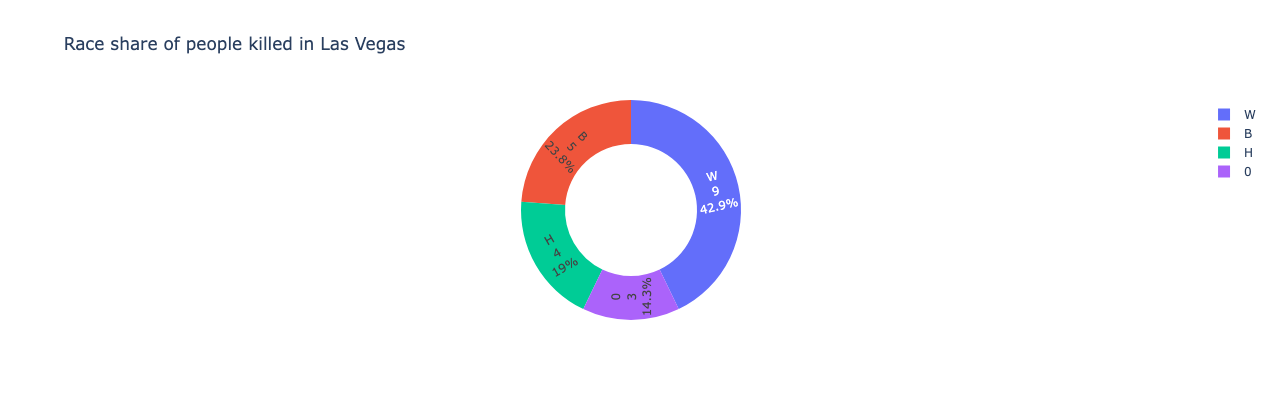

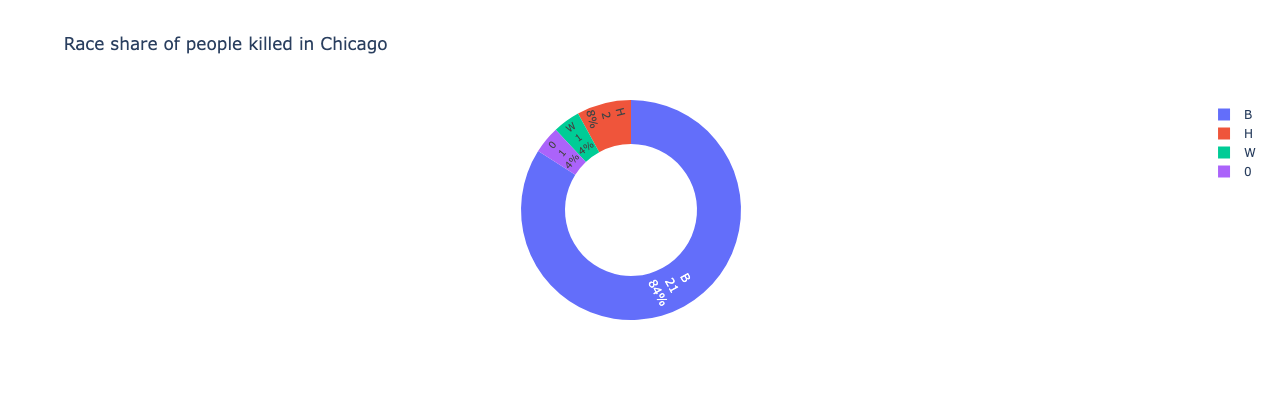

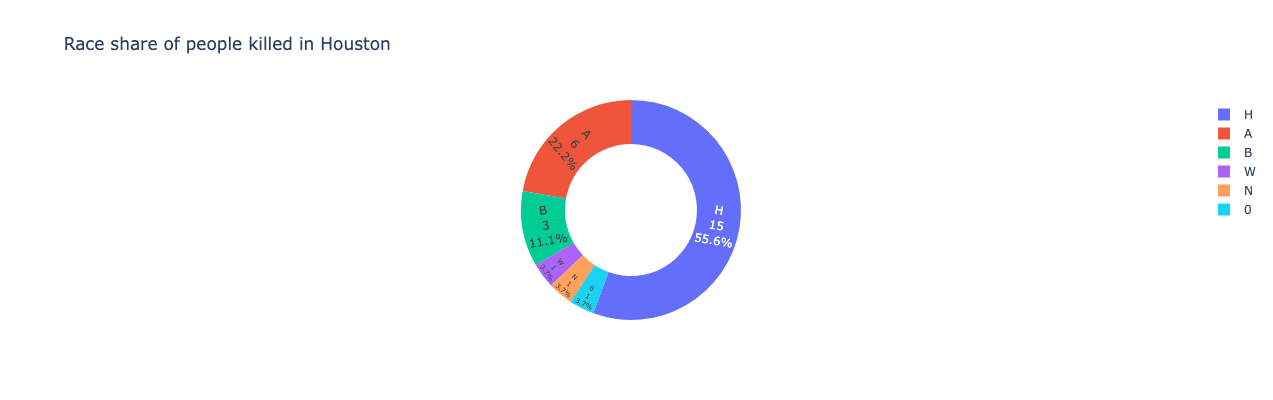

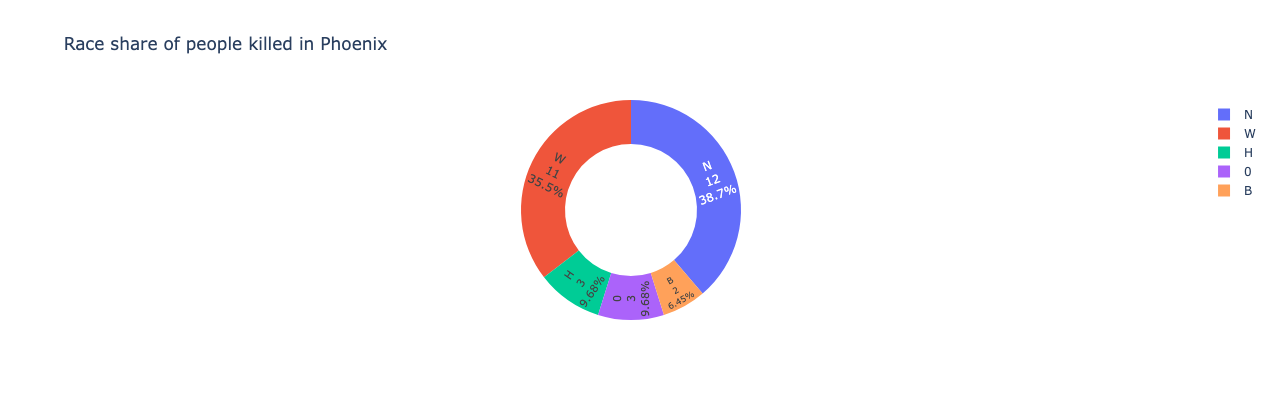

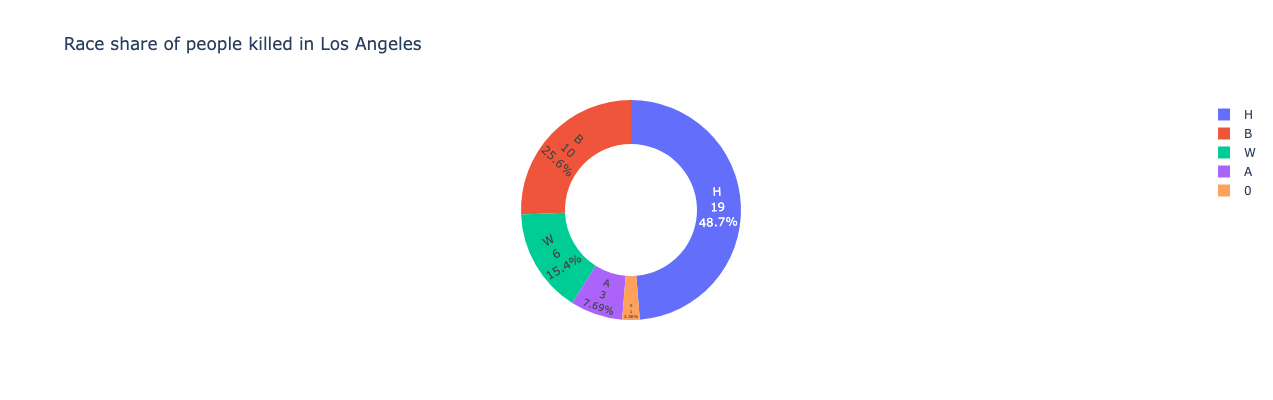

In [539]:
for city in result.city.unique():
    fig = px.pie(labels=result[result['city'] == city].race.unique(), values=result[result['city'] == city].value_counts('race'),
             names=result[result['city'] == city].race.unique(),hole=0.6, width=800, height=400, title=f"Race share of people killed in {city}")
    fig.update_traces(textposition='inside', textinfo='percent+value+label')
    fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [540]:
len(df_fatalities_clean['state'].unique())

51

In [541]:
df_fatalities_state = df_fatalities_clean.groupby(['state'], as_index=False).agg({'id': pd.Series.count})

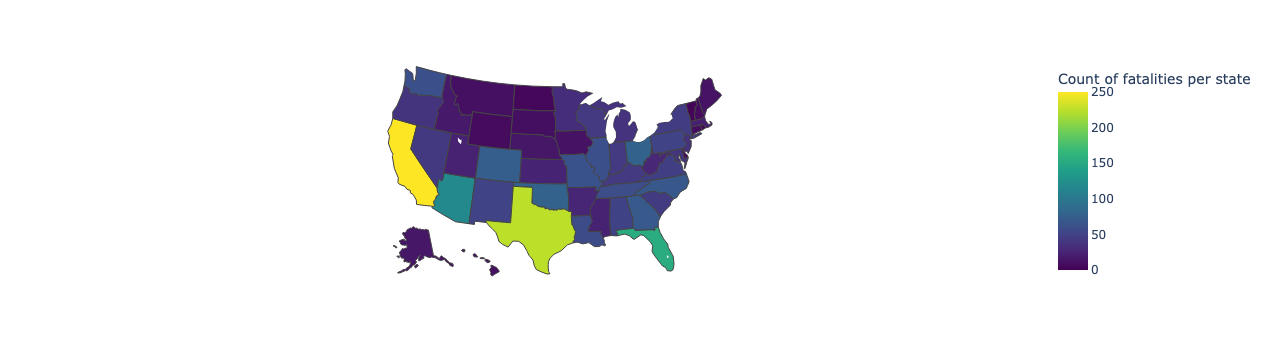

In [542]:
fig = px.choropleth(df_fatalities_state, locationmode="USA-states", locations='state', color=df_fatalities_state.id,
                           color_continuous_scale="Viridis",
                           range_color=(0, 250),
                           scope="usa",
                           labels={'id':'Count of fatalities per state'}
                          )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [545]:
df_fatalities_clean.date = pd.to_datetime(df_fatalities_clean.date)

In [551]:
df_fatalities_clean['year'] = df_fatalities_clean.date.dt.year

In [552]:
df_fatalities_clean['month'] = df_fatalities_clean.date.dt.month

In [553]:
df_fatalities_clean

id                name       date   manner_of_death       armed  age  \
0        3          Tim Elliot 2015-02-01              shot         gun   53   
1        4    Lewis Lee Lembke 2015-02-01              shot         gun   47   
2        5  John Paul Quintero 2015-03-01  shot and Tasered     unarmed   23   
3        8     Matthew Hoffman 2015-04-01              shot  toy weapon   32   
4        9   Michael Rodriguez 2015-04-01              shot    nail gun   39   
...    ...                 ...        ...               ...         ...  ...   
2530  2822    Rodney E. Jacobs 2017-07-28              shot         gun   31   
2531  2813               TK TK 2017-07-28              shot     vehicle    0   
2532  2818  Dennis W. Robinson 2017-07-29              shot         gun   48   
2533  2817       Isaiah Tucker 2017-07-31              shot     vehicle   28   
2534  2815        Dwayne Jeune 2017-07-31              shot       knife   32   

     gender race           city state  signs_of_mental_illness threat_level  \
0         M    A        Shelton    WA                     True       attack   
1         M    W          Aloha    OR                    False       attack   
2         M    H        Wichita    KS                    False        other   
3         M    W  San Francisco    CA                     True       attack   
4         M    H          Evans    CO                    False       attack   
...     ...  ...            ...   ...                      ...          ...   
2530      M    0    Kansas City    MO                    False       attack   
2531      M    0    Albuquerque    NM                    False       attack   
2532      M    0          Melba    ID                    False       attack   
2533      M    B        Oshkosh    WI                    False       attack   
2534      M    B       Brooklyn    NY                     True       attack   

             flee  body_camera  year  month  
0     Not fleeing        False  2015      2  
1     Not fleeing        False  2015      2  
2     Not fleeing        False  2015      3  
3     Not fleeing        False  2015      4  
4     Not fleeing        False  2015      4  
...           ...          ...   ...    ...  
2530  Not fleeing        False  2017      7  
2531          Car        False  2017      7  
2532          Car        False  2017      7  
2533          Car         True  2017      7  
2534  Not fleeing        False  2017      7  

[2535 rows x 16 columns]

In [560]:
df_fatailities_year = df_fatalities_clean.groupby([ 'year', 'month'], as_index=False).agg({'id': pd.Series.count})

In [574]:
df_fatailities_year['day'] = 1

In [576]:
df_fatailities_year['date'] = pd.to_datetime((df_fatailities_year.year*10000+df_fatailities_year.month*100+df_fatailities_year.day).apply(str),format='%Y%m%d')

In [577]:
df_fatailities_year

year  month  id  day       date
0   2015      1  70    1 2015-01-01
1   2015      2  78    1 2015-02-01
2   2015      3  87    1 2015-03-01
3   2015      4  88    1 2015-04-01
4   2015      5  85    1 2015-05-01
5   2015      6  68    1 2015-06-01
6   2015      7  85    1 2015-07-01
7   2015      8  86    1 2015-08-01
8   2015      9  90    1 2015-09-01
9   2015     10  89    1 2015-10-01
10  2015     11  80    1 2015-11-01
11  2015     12  85    1 2015-12-01
12  2016      1  85    1 2016-01-01
13  2016      2  79    1 2016-02-01
14  2016      3  89    1 2016-03-01
15  2016      4  75    1 2016-04-01
16  2016      5  82    1 2016-05-01
17  2016      6  90    1 2016-06-01
18  2016      7  78    1 2016-07-01
19  2016      8  79    1 2016-08-01
20  2016      9  71    1 2016-09-01
21  2016     10  77    1 2016-10-01
22  2016     11  84    1 2016-11-01
23  2016     12  74    1 2016-12-01
24  2017      1  75    1 2017-01-01
25  2017      2  69    1 2017-02-01
26  2017      3  74    1 2017-03-01
27  2017      4  70    1 2017-04-01
28  2017      5  61    1 2017-05-01
29  2017      6  63    1 2017-06-01
30  2017      7  71    1 2017-07-01
31  2017      8  18    1 2017-08-01
32  2017      9  23    1 2017-09-01
33  2017     10  21    1 2017-10-01
34  2017     11  16    1 2017-11-01
35  2017     12  20    1 2017-12-01

In [556]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

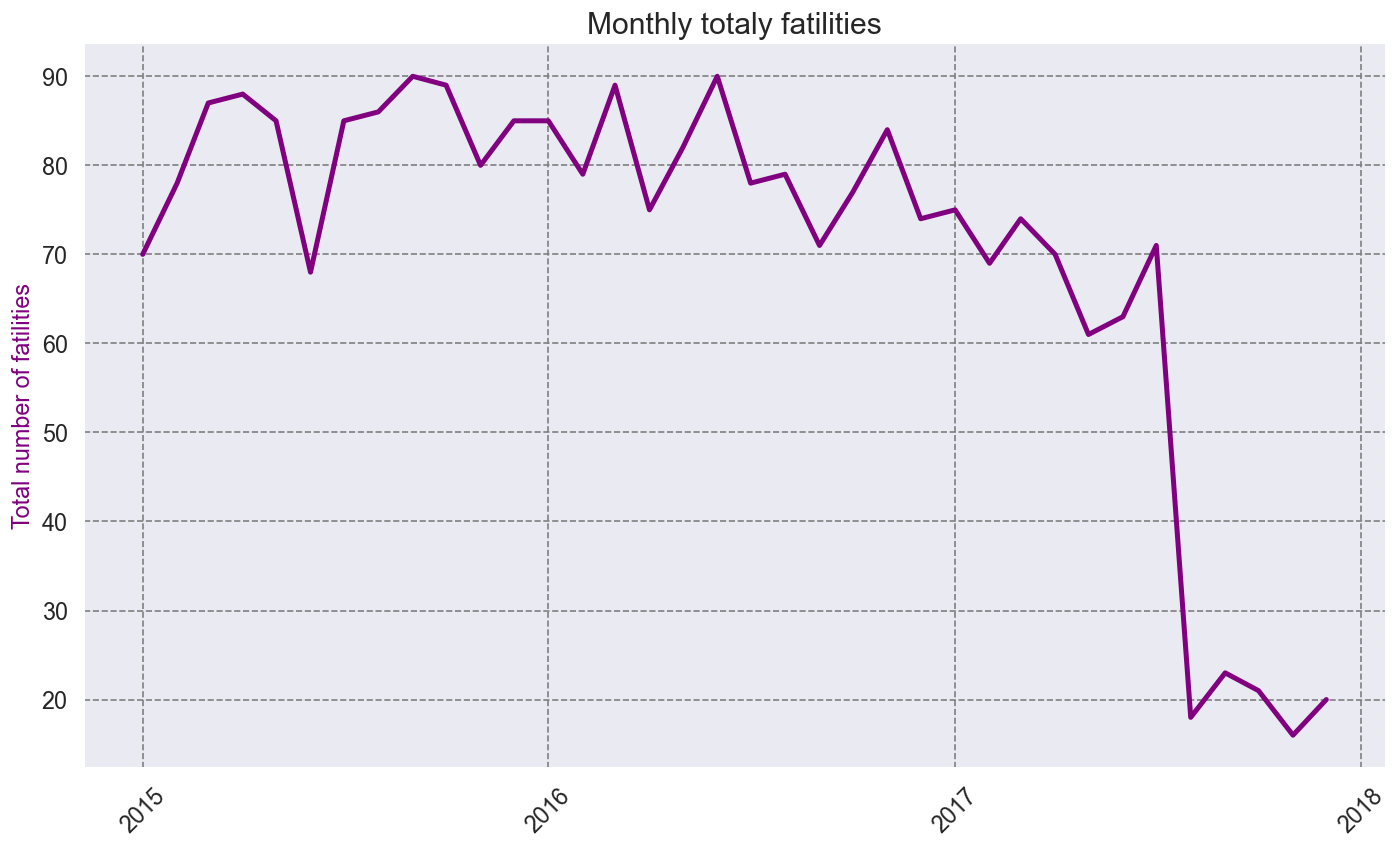

In [581]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly totaly fatilities', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()


ax1.set_ylabel('Total number of fatilities', color='purple', fontsize=14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# ax1.set_ylim([df_fatailities_month.id.min(), df_fatailities_month.id.max()])
# ax1.set_xlim([df_fatailities_year.year.min(), df_fatailities_year.year.max()])

# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')

# Change the dataset used
ax1.plot(df_fatailities_year.date, df_fatailities_year.id, 
         color='purple', linewidth=3, linestyle='-')

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).